In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick


In [2]:
MMLU_Results = pd.read_pickle('../results/5_Shot_MMLU_Computer_Security_Results/llm_mmlu.pkl')

In [3]:
MMLU_Results

,Model,Accuracy Mean,Accuracy Max,Accuracy Min,Accuracy STD,Accuracy Partial Mean,Accuracy Partial Max,Accuracy Partial Min,Accuracy Partial STD
0,Dolphin-2.5,0.740,0.80,0.68,0.044159,0.740,0.80,0.68,0.044159
1,Llama2-70b,0.750,0.78,0.70,0.031623,0.750,0.78,0.70,0.031623
2,Mixtral-8x-7b,0.780,0.83,0.74,0.036056,0.780,0.83,0.74,0.036056
3,Phi-2,0.642,0.70,0.59,0.049699,0.642,0.70,0.59,0.049699
4,Yi-34b,0.534,0.57,0.51,0.023022,0.534,0.57,0.51,0.023022


In [4]:
OFFICIAL_HELM = pd.read_pickle('../data/official_sec_mmlu_results.pkl')

In [5]:
OFFICIAL_HELM

,Model,Accuracy
0,Yi-34b,0.83
1,Mixtral-8x-7b,0.82
2,Llama2-70b,0.75
3,Phi-2,0.73


In [15]:
def plot_evaluation_MMLU(llm_result_df, helm_result, df1_name, df2_name, title=None):
    """
    Plots evaluation metrics from two DataFrames containing columns:
        - 'Model'
        - 'Accuracy'
    """
    
    # Define colors for the models
    color_llm_result = 'b'
    color_helm_result = 'orange'

    # Define bar width and gap
    bar_width = 0.2  # Decrease bar width for side-by-side bars with a gap
    gap = 0.05  # Define gap between bars

    # Merge the two dataframes by column Model and create a new dataframe and rename the column Accuracy Mean to Accuracy Mean LLM and Accuracy to Accuracy HELM
    llm_result_df = pd.merge(llm_result_df, helm_result, on='Model', suffixes=('_LLM', '_HELM'))
    llm_result_df = llm_result_df.rename(columns={'Accuracy': 'Accuracy_HELM', 'Accuracy': 'Accuracy_LLM'})

    display(llm_result_df)

    # Just one plot
    fig, ax = plt.subplots(figsize=(14, 6))

    for i, model in enumerate(llm_result_df['Model']):
        bars_llm = ax.bar(i - bar_width - gap / 2, llm_result_df.loc[i, 'Accuracy_LLM'], bar_width, color=color_llm_result)
        bars_helm = ax.bar(i + gap / 2, llm_result_df.loc[i, 'Accuracy_HELM'], bar_width, color=color_helm_result)

    ax.set_ylabel('Accuracy (%)')
    ax.set_title('Accuracy own approach vs. Official HELM results', fontsize=12)
    ax.set_xticks([i for i in range(len(llm_result_df['Model']))])
    ax.set_xticklabels(llm_result_df['Model'], rotation=45, ha='right', fontsize=10)
    ax.legend([bars_llm, bars_helm], [df1_name, df2_name])
    ax.set_ylim([0, 1])
    ax.yaxis.set_major_locator(mtick.MultipleLocator(0.1))
    ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
    ax.grid(True, linestyle='dotted', axis='y')

    # Add horizontal line to Accuracy subplot
    ax.axhline(y=0.25, color='r', linestyle='--')

    # Add title to the figure
    if title is not None:
        fig.suptitle(title, fontsize=16, y=1.05)

    plt.show()

In [32]:
def plot_evaluation_MMLU_error(llm_result_df, helm_result, df1_name, df2_name, title=None):
    """
    Plots evaluation metrics from two DataFrames containing columns:
        - 'Model'
        - 'Accuracy'
    """
    
    # Define colors for the models
    color_llm_result = 'b'
    color_helm_result = 'orange'

    # Define bar width and gap
    bar_width = 0.2  # Decrease bar width for side-by-side bars with a gap
    gap = 0.05  # Define gap between bars

    # Merge the two dataframes by column Model and create a new dataframe and rename the column Accuracy Mean to Accuracy Mean LLM and Accuracy to Accuracy HELM
    llm_result_df = pd.merge(llm_result_df, helm_result, on='Model', suffixes=('_LLM', '_HELM'))
    llm_result_df = llm_result_df.rename(columns={'Accuracy': 'Accuracy_HELM', 'Accuracy Mean': 'Accuracy_LLM'})

    display(llm_result_df)

    # Just one plot
    fig, ax = plt.subplots(figsize=(14, 6))

    for i, model in enumerate(llm_result_df['Model']):
        mean_accuracy_llm = llm_result_df.loc[i, 'Accuracy_LLM']
        min_accuracy_llm = llm_result_df.loc[i, 'Accuracy Min']
        max_accuracy_llm = llm_result_df.loc[i, 'Accuracy Max']
        
        bars_llm = ax.bar(i - bar_width - gap / 2, mean_accuracy_llm, bar_width, color=color_llm_result,
                          yerr=[[mean_accuracy_llm - min_accuracy_llm], [max_accuracy_llm - mean_accuracy_llm]],
                          capsize=5)
        
        ax.plot([i - bar_width - gap / 2, i - bar_width - gap / 2], [min_accuracy_llm, max_accuracy_llm], color='k', linestyle='-', linewidth=1)
        bars_helm = ax.bar(i + gap / 2, llm_result_df.loc[i, 'Accuracy_HELM'], bar_width, color=color_helm_result)

    ax.set_ylabel('Accuracy (%)')
    ax.set_title('Accuracy own approach vs. Official HELM results', fontsize=12)
    ax.set_xticks([i for i in range(len(llm_result_df['Model']))])
    ax.set_xticklabels(llm_result_df['Model'], rotation=45, ha='right', fontsize=10)
    ax.legend([bars_llm, bars_helm], [df1_name, df2_name])
    ax.set_ylim([0, 1])
    ax.yaxis.set_major_locator(mtick.MultipleLocator(0.1))
    ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
    ax.grid(True, linestyle='dotted', axis='y')

    # Add horizontal line to Accuracy subplot
    ax.axhline(y=0.25, color='r', linestyle='--')

    # Add title to the figure
    if title is not None:
        fig.suptitle(title, fontsize=16, y=1.05)

    plt.show()


In [15]:
OFFICIAL_HELM

,Model,Accuracy
0,Yi-34b,0.83
1,Mixtral-8x-7b,0.82
2,Llama2-70b,0.75
3,Phi-2,0.73


In [7]:
mmlu_detailed = pd.read_pickle('../results/5_Shot_MMLU_Computer_Security_Results/llm_prob_result_detailed_mmlu.pkl')

In [18]:
#Save the first results of each Model into a new DataFrame that has the same structure as the official HELM results
mmlu_detailed_2 = mmlu_detailed.groupby('Model').first().reset_index()

#Drop the Dolphin-2.5 model as it is not part of the official HELM results
mmlu_detailed_2 = mmlu_detailed_2[mmlu_detailed_2.Model != 'Dolphin-2.5']

#Keep only Model and Accuracy columns
mmlu_detailed_2 = mmlu_detailed_2[['Model', 'Accuracy']]

#

mmlu_detailed_2


plot_evaluation_MMLU(mmlu_detailed_2, OFFICIAL_HELM, 'Own Approach', 'Official HELM', 'Dataset MMLU unshuffled')

NameError: name 'mmlu_detailed' is not defined

In [12]:
MMLU_Results

,Model,Accuracy Mean,Accuracy Max,Accuracy Min,Accuracy STD,Accuracy Partial Mean,Accuracy Partial Max,Accuracy Partial Min,Accuracy Partial STD
0,Dolphin-2.5,0.740,0.80,0.68,0.044159,0.740,0.80,0.68,0.044159
1,Llama2-70b,0.750,0.78,0.70,0.031623,0.750,0.78,0.70,0.031623
2,Mixtral-8x-7b,0.780,0.83,0.74,0.036056,0.780,0.83,0.74,0.036056
3,Phi-2,0.642,0.70,0.59,0.049699,0.642,0.70,0.59,0.049699
4,Yi-34b,0.534,0.57,0.51,0.023022,0.534,0.57,0.51,0.023022


,Model,Accuracy_LLM,Accuracy Max,Accuracy Min,Accuracy STD,Accuracy Partial Mean,Accuracy Partial Max,Accuracy Partial Min,Accuracy Partial STD,Accuracy_HELM
0,Llama2-70b,0.750,0.78,0.70,0.031623,0.750,0.78,0.70,0.031623,0.75
1,Mixtral-8x-7b,0.780,0.83,0.74,0.036056,0.780,0.83,0.74,0.036056,0.82
2,Phi-2,0.642,0.70,0.59,0.049699,0.642,0.70,0.59,0.049699,0.73
3,Yi-34b,0.534,0.57,0.51,0.023022,0.534,0.57,0.51,0.023022,0.83


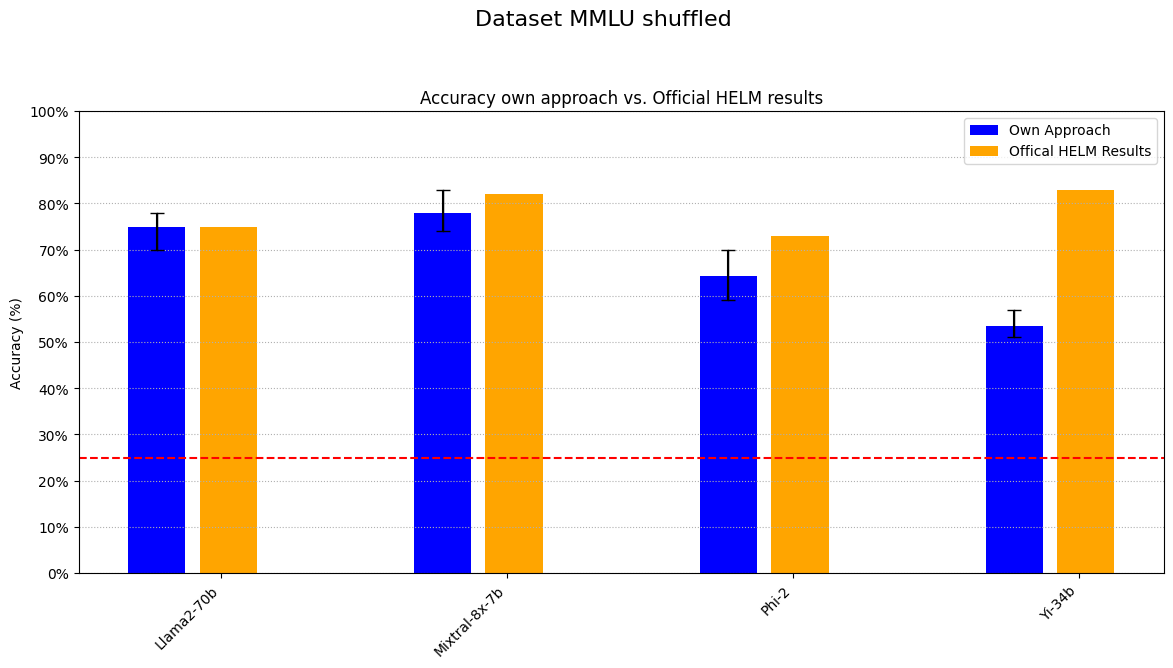

In [34]:
plot_evaluation_MMLU_error(MMLU_Results, OFFICIAL_HELM, 'Own Approach', 'Offical HELM Results', 'Dataset MMLU shuffled')

In [35]:
def plot_evaluation_CCNA(evaluation_df, hline_accuracy=None, hline_partial=None, title=None):
    """
    Plots evaluation metrics from a DataFrame containing columns:
        - 'Model'
        - 'Accuracy Mean', 'Accuracy Min', 'Accuracy Max'
        - 'Accuracy Partial Mean', 'Accuracy Partial Min', 'Accuracy Partial Max'
    """

    # Define a list of colors for the models
    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

    # Define bar width
    bar_width = 0.5  # Increase bar width for thicker bars

    # --- Subplot 1: Accuracy ---
    fig, axs = plt.subplots(1, 2, figsize=(14, 6))

    for i, model in enumerate(evaluation_df['Model']):
        bars = axs[0].bar(i + bar_width * i, evaluation_df.loc[i, 'Accuracy Mean'], bar_width, 
                   yerr=[[abs(evaluation_df.loc[i, 'Accuracy Mean'] - evaluation_df.loc[i, 'Accuracy Min'])], [abs(evaluation_df.loc[i, 'Accuracy Max'] - evaluation_df.loc[i, 'Accuracy Mean'])]],
                   label=model, color=colors[i % len(colors)], capsize=5)

    axs[0].set_ylabel('Accuracy (%)')
    axs[0].set_title('Accuracy Mean with Error Bars (Max and Min)', fontsize=12)
    axs[0].set_xticks([i + bar_width * i for i in range(len(evaluation_df['Model']))])
    axs[0].set_xticklabels(evaluation_df['Model'], rotation=45, ha='right', fontsize=10)
    axs[0].legend()
    axs[0].set_ylim([0, 1])
    axs[0].yaxis.set_major_locator(mtick.MultipleLocator(0.1))
    axs[0].yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
    axs[0].grid(True, linestyle='dotted', axis='y')

    # Add horizontal line to Accuracy subplot
    if hline_accuracy is not None:
        axs[0].axhline(y=hline_accuracy, color='r', linestyle='--')

    # --- Subplot 2: Partial Accuracy ---
    for i, model in enumerate(evaluation_df['Model']):
        bars = axs[1].bar(i + bar_width * i, evaluation_df.loc[i, 'Accuracy Partial Mean'], bar_width,
                   yerr=[[abs(evaluation_df.loc[i, 'Accuracy Partial Mean'] - evaluation_df.loc[i, 'Accuracy Partial Min'])], [abs(evaluation_df.loc[i, 'Accuracy Partial Max'] - evaluation_df.loc[i, 'Accuracy Partial Mean'])]],
                   label=model, color=colors[i % len(colors)], capsize=5)

    axs[1].set_ylabel('Accuracy Partial (%)')
    axs[1].set_title('Accuracy Partial Mean with Error Bars (Max and Min)', fontsize=12)
    axs[1].set_xticks([i + bar_width * i for i in range(len(evaluation_df['Model']))])
    axs[1].set_xticklabels(evaluation_df['Model'], rotation=45, ha='right', fontsize=10)
    axs[1].legend()
    axs[1].set_ylim([0, 1])
    axs[1].yaxis.set_major_locator(mtick.MultipleLocator(0.1))
    axs[1].yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
    axs[1].grid(True, linestyle='dotted', axis='y')

    # Add horizontal line to Partial Accuracy subplot
    if hline_partial is not None:
        axs[1].axhline(y=hline_partial, color='r', linestyle='--')

    fig.tight_layout(pad=1.2)  # Decrease padding for closer plots

    # Add title to the figure
    if title is not None:
        fig.suptitle(title, fontsize=16, y=1.05)

    plt.show()

In [38]:
CCNA = pd.read_pickle('../results/5_Shot_201_301_CCNA/llm_5_Shot_201_301.pkl')

In [39]:
CCNA

,Model,Accuracy Mean,Accuracy Max,Accuracy Min,Accuracy STD,Accuracy Partial Mean,Accuracy Partial Max,Accuracy Partial Min,Accuracy Partial STD
0,Dolphin-2.5,0.566667,0.588235,0.544118,0.015732,0.632129,0.642570,0.622490,0.008328
1,Llama2-70b,0.327451,0.362745,0.299020,0.022835,0.378313,0.405622,0.349398,0.020360
2,Mixtral-8x-7b,0.581373,0.607843,0.544118,0.026077,0.635341,0.662651,0.602410,0.023140
3,Phi-2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,Yi-34b,0.184314,0.225490,0.151961,0.030337,0.162249,0.196787,0.132530,0.024854
